## Gradient Boosting

Gradient boost algorithm is a generalized boosting algorithm that can be used for both classification and regression tasks, which uses decision trees as base learners.

<b>Note that AdaBoost is a special case of gradient boosting algorithm that uses exponential loss function.</b>

<b>Assumptions of Gradient Boosting:</b>
1. Independence of observations
2. Strictly additive model for depth of 1. The larger the number of depths, the less strictly additive the model is.

<b>Requirement of feature scaling: No</b>

<b>Robust to outliers: Yes</b>

<b>Advantages of Gradient Boost:</b>
1. Able to handle missing data
2. Flexible model that allows optimizing different loss functions
3. Captures non-linear relationships

<b>Disadvantages of Gradient Boost:</b>
1. Prone to overfitting, such that outliers may be overemphasized unless regularization is used
2. Computationally expensive
3. Large space of hyperparameter tuning required
4. Difficult to interpret final model

<b>Time complexity of model training: O(n*log(n)*f*m)</b>

<b>Time complexity of model prediction: O(k*m)</b>

<b>Space complexity of model prediction: O(p * m + b * m) </b>

n - Number of training samples

f - Number of features

k - Depth of decision tree

p - Number of nodes in decision tree

m - Number of decision trees

b - Shrinkage factor

<b>Methods to handle imbalanced dataset</b>:
1. Resampling techniques (Oversampling/SMOTETomek)
2. Assign sample_weight to fit method

## Practical steps of Gradient Boost algorithm (Regression)

The following steps are involved in the Gradient Boost algorithm for regression:

1. Set initial prediction value as average of all target values for all rows in the dataset.


2. Compute pseudo residuals as follows:
- Pseudo residual = Actual value - Average value from 1st step

3. Construct a decision tree with pseudo residuals as outputs of decision tree. Pseudo residuals that belong to the same leaf node will be averaged accordingly.


4. New prediction values are made using the following formula for all rows in the dataset:
- <b>New prediction value = Average value from 1st step + learning rate * residual predicted from 3rd step</b>

5. Compute new residual values as follows:
- New residual = Actual value - New prediction value from step 4

6. <b>Repeat steps 3 to 5 until number of estimators is reached</b> as specified in the model.

Note that the most common loss function used in regression task for gradient boost algorithm is <b>half of MSE</b> as follows:

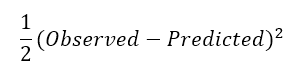

## Practical steps of Gradient Boost algorithm (Binary Classification)

The following steps are involved in the Gradient Boost algorithm for binary classification:

1. Compute log of odds between two classes as follows:

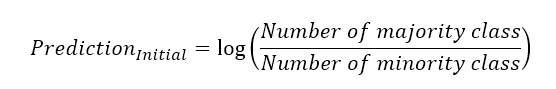

2. Set initial constant probability of majority class using the following formula for every row in the dataset:

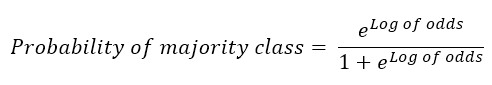

3. Compute pseudo residuals as follows:
- Pseudo residual = Actual binary outcome (0 or 1) - Previous probability of majority class

4. Construct a decision tree with pseudo residuals as outputs of decision tree. 

5. Outputs from pseudo residuals need to be transformed using the following formula:

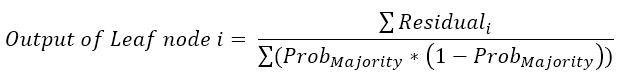

6. New log of odds values are made using the following formula for all rows in the dataset:
- <b>New log of odds = Previous log of odds + learning rate * output from 5th step</b>

7. New probability of majority class for every row is set using the following formula:

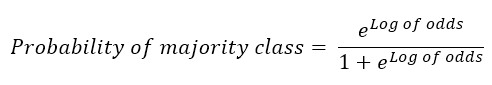

8. <b>Repeat steps 3 to 7 until number of estimators is reached</b> as specified in the model.

Note that the most common loss function used in classification task for gradient boost algorithm is <b>negative log-likelihood</b> as follows:

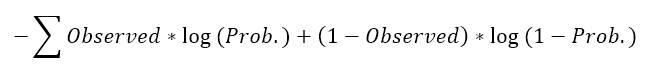

## How Gradient Boost makes predictions from test data?

For classification tasks, gradient boost algorithm makes final prediction from test data by using the following formula:

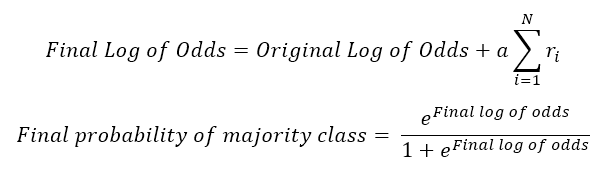

Note that optimum threshold used to determine record belonging to majority class is based on either ROC curves (balanced class) or Precision-Recall curves (imbalanced class).

For regression tasks, gradient boost algorithm makes final prediction from test data by using the following formula:

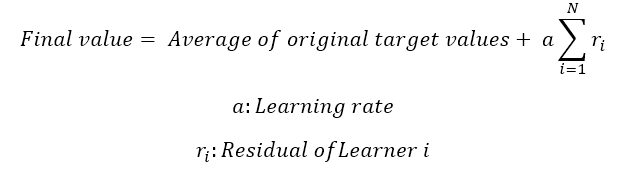

## Gradient Boost Classifier Example

Refer to the following documentation for more details about the use of gradient boost classification on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

The following example below illustrates the process of creating a gradient boost classification model using sklearn library after feature engineering.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.datasets import fetch_kddcup99
import missingno
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
dataset = fetch_kddcup99()
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=dataset['target_names'])],axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [3]:
# Checking for duplicated rows if exist
data[data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
2500,0,b'tcp',b'http',b'SF',307,60990,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2864,0,b'tcp',b'http',b'SF',351,11485,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2977,0,b'tcp',b'http',b'SF',506,2419,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3003,0,b'tcp',b'http',b'SF',319,1374,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3130,0,b'tcp',b'http',b'SF',234,1212,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493142,0,b'tcp',b'http',b'SF',303,480,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493168,0,b'tcp',b'http',b'SF',230,43464,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493325,0,b'tcp',b'http',b'SF',337,398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493750,0,b'tcp',b'http',b'SF',206,998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [4]:
# Removing duplicated records if exist
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [5]:
data.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

In [6]:
data = data.drop(['num_outbound_cmds','is_host_login'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [7]:
data[np.array(data.columns[22:29])] = data[np.array(data.columns[22:29])].astype('float')
data[np.array(data.columns[31:39])] = data[np.array(data.columns[31:39])].astype('float')
data[['protocol_type','service','flag','labels']] = data[['protocol_type','service','flag','labels']].applymap(
                                                    lambda x: x.decode('ascii'))

In [8]:
data['labels'].value_counts()/len(data['labels'])

normal.             0.603300
neptune.            0.355941
back.               0.006649
teardrop.           0.006306
satan.              0.006223
warezclient.        0.006134
ipsweep.            0.004472
smurf.              0.004403
portsweep.          0.002857
pod.                0.001415
nmap.               0.001085
guess_passwd.       0.000364
buffer_overflow.    0.000206
warezmaster.        0.000137
land.               0.000131
imap.               0.000082
rootkit.            0.000069
loadmodule.         0.000062
ftp_write.          0.000055
multihop.           0.000048
phf.                0.000027
perl.               0.000021
spy.                0.000014
Name: labels, dtype: float64

In [9]:
data['labels'] = data['labels'].map(lambda x: 'others' if x not in ['normal.','neptune.'] else x)
data['labels'].value_counts()/len(data['labels'])

normal.     0.603300
neptune.    0.355941
others      0.040759
Name: labels, dtype: float64

In [10]:
integer_columns = np.array(data.select_dtypes(include='object').drop(['protocol_type','service','flag','labels'],axis=1).columns)
data[integer_columns] = data[integer_columns].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int32  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int32  
 5   dst_bytes                    145586 non-null  int32  
 6   land                         145586 non-null  int32  
 7   wrong_fragment               145586 non-null  int32  
 8   urgent                       145586 non-null  int32  
 9   hot                          145586 non-null  int32  
 10  num_failed_logins            145586 non-null  int32  
 11  logged_in                    145586 non-null  int32  
 12  num_compromised              145586 non-null  int32  
 13 

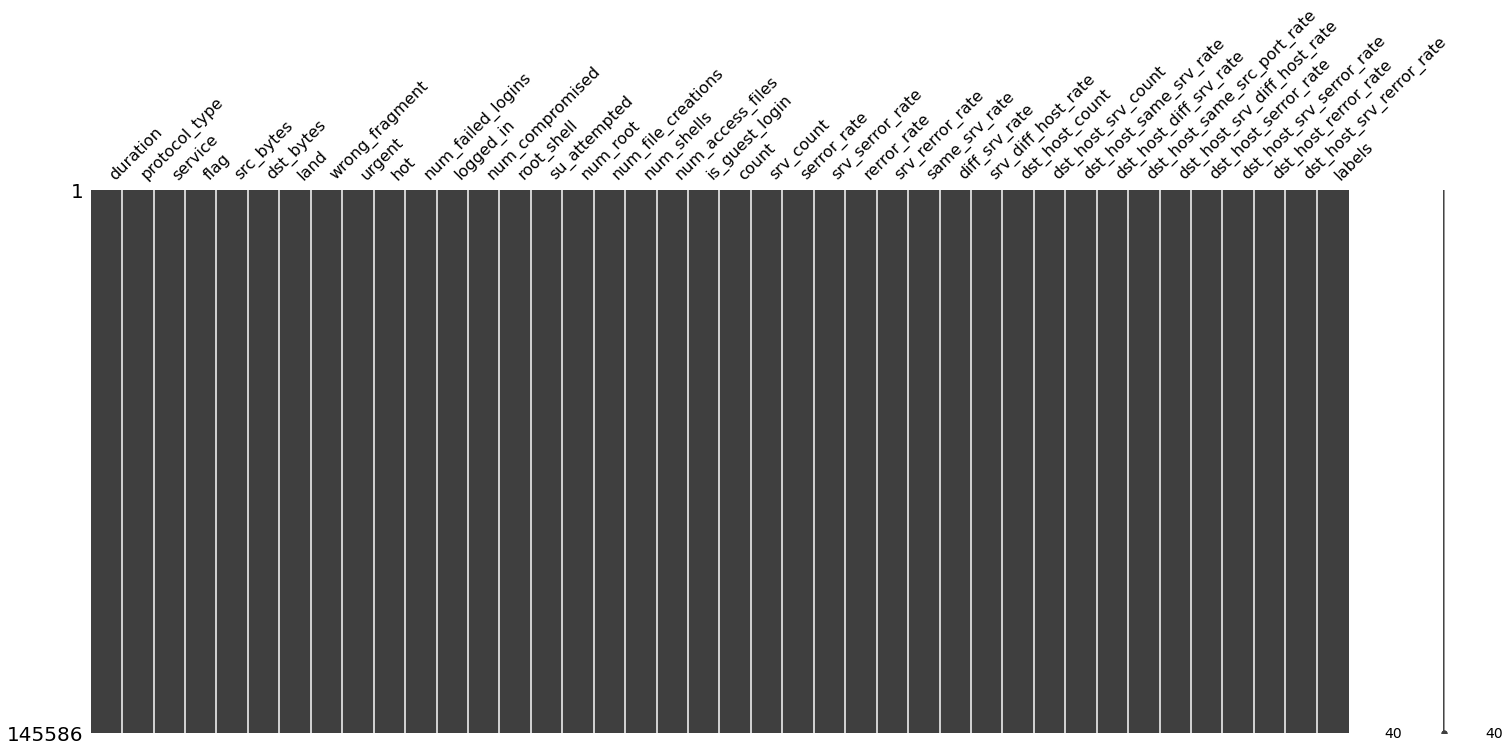

In [11]:
# Checking for missing values of features and labels if exist
missingno.matrix(data)
plt.show()

In [12]:
for column in data.columns[data.nunique()<30]:
    print(data[column].value_counts()/len(data))
    print('')

tcp     0.899214
udp     0.084259
icmp    0.016526
Name: protocol_type, dtype: float64

SF        0.600738
S0        0.290399
REJ       0.101054
RSTO      0.003908
RSTR      0.002919
S1        0.000392
SH        0.000234
S2        0.000165
RSTOS0    0.000076
S3        0.000069
OTH       0.000048
Name: flag, dtype: float64

0    0.999863
1    0.000137
Name: land, dtype: float64

0    0.992300
3    0.006251
1    0.001449
Name: wrong_fragment, dtype: float64

0    0.999973
1    0.000014
2    0.000007
3    0.000007
Name: urgent, dtype: float64

0     0.986558
2     0.006580
28    0.001882
1     0.001752
4     0.000769
6     0.000714
5     0.000350
3     0.000261
14    0.000254
30    0.000192
22    0.000192
19    0.000158
24    0.000089
18    0.000089
20    0.000069
7     0.000034
17    0.000014
12    0.000014
16    0.000007
10    0.000007
15    0.000007
9     0.000007
Name: hot, dtype: float64

0    0.999567
1    0.000392
2    0.000021
5    0.000007
4    0.000007
3    0.000007
Name: num_fa

In [13]:
X = data.drop(['labels'],axis=1)
y = data['labels']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [15]:
# Checking number of unique categories for service variable
X_train['service'].nunique()

64

In [16]:
# Checking frequency of each category type for service variable
X_train['service'].value_counts()

http           43418
private        34362
smtp            6825
domain_u        3774
other           3363
ftp_data        3219
ecr_i            726
eco_i            642
ftp              562
finger           453
telnet           383
urp_i            308
ntp_u            209
auth             207
pop_3            154
time             105
mtp               86
iso_tsap          84
csnet_ns          84
discard           82
sql_net           82
vmnet             81
domain            80
gopher            80
whois             80
rje               79
systat            79
remote_job        79
klogin            78
echo              78
imap4             78
hostnames         77
supdup            76
kshell            75
bgp               73
login             73
nntp              73
ssh               73
nnsp              72
pop_2             72
shell             72
courier           72
printer           71
netbios_ssn       71
uucp_path         70
Z39_50            69
sunrpc            69
netbios_dgm  

In [17]:
# Hash encoding on Service variable
hashencoder = ce.hashing.HashingEncoder(cols='service', n_components=8)
X_train_encoded = hashencoder.fit_transform(X_train, y_train)
X_test_encoded = hashencoder.transform(X_test, y_test)

X_train_encoded = X_train_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})
X_test_encoded = X_test_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})

In [18]:
# One hot encoding on protocol_type and flag variable
onehotencoder = ce.OneHotEncoder(cols=['protocol_type','flag'])
X_train_encoded = onehotencoder.fit_transform(X_train_encoded)
X_test_encoded = onehotencoder.transform(X_test_encoded)

In [19]:
# Gradient boost classifier with default hyperparameters
clf = GradientBoostingClassifier()
clf.fit(X_train_encoded, y_train)
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))
print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test_encoded), multi_class='ovr', average = 'macro')}")

              precision    recall  f1-score   support

    neptune.   1.000000  0.999808  0.999904     15596
     normal.   0.997955  0.999583  0.998768     26360
      others   0.993452  0.970349  0.981765      1720

    accuracy                       0.998512     43676
   macro avg   0.997136  0.989913  0.993479     43676
weighted avg   0.998508  0.998512  0.998504     43676

ROC AUC Score: 0.9999158140988995


In [20]:
def cf_matrix_plot(cf_matrix, labeled):
    """
        Plots a confusion matrix for binary classification problem using heatmaps.
    """
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2f}%" for value in cf_matrix.flatten()/np.sum(cf_matrix)*100]
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    plt.figure(figsize=(15,8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=labeled,yticklabels=labeled)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.show()

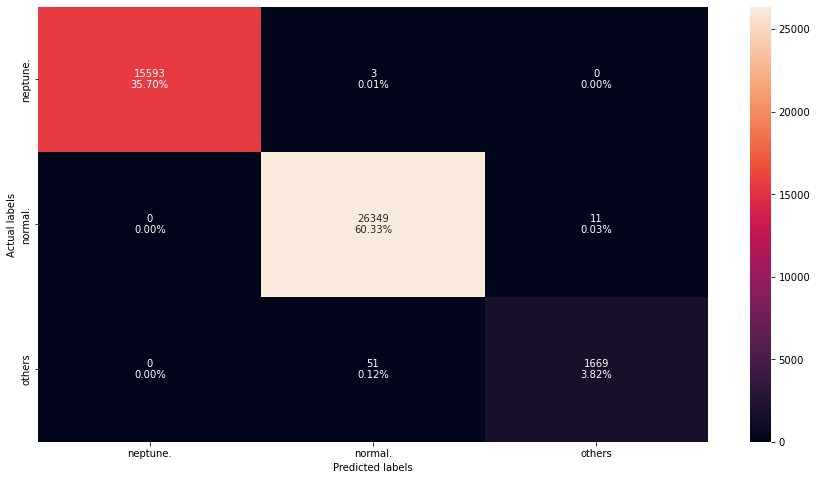

In [21]:
# Confusion matrix heatmap
y_pred = clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

In [22]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
params = {'learning_rate': Real(0.1,1), 
          'subsample': Real(0.1,1), 
          'min_samples_split': Integer(2,100),
          'min_samples_leaf':Integer(1,100), 
          'min_weight_fraction_leaf': Real(0,0.5), 
          'max_depth': Integer(1,10),
          'min_impurity_decrease': Real(0.0,1.0),
          'max_features': Categorical([None,'sqrt','log2']),
          'max_leaf_nodes': Integer(8,32)}

clf_cv = BayesSearchCV(GradientBoostingClassifier(),params,cv=5,verbose=1,n_jobs=-1,scoring='accuracy')
clf_cv.fit(X_train_encoded, y_train)
clf_cv.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('learning_rate', 0.1),
             ('max_depth', 6),
             ('max_features', None),
             ('max_leaf_nodes', 12),
             ('min_impurity_decrease', 0.30634783079248473),
             ('min_samples_leaf', 69),
             ('min_samples_split', 53),
             ('min_weight_fraction_leaf', 0.0),
             ('subsample', 0.7393686725001437)])

In [23]:
# Gradient Boost classifier with best hyperparameters
clf = GradientBoostingClassifier(learning_rate=clf_cv.best_params_['learning_rate'],
                                 subsample=clf_cv.best_params_['subsample'],
                                 min_samples_split=clf_cv.best_params_['min_samples_split'],
                                 min_samples_leaf=clf_cv.best_params_['min_samples_leaf'],
                                 min_weight_fraction_leaf=clf_cv.best_params_['min_weight_fraction_leaf'],
                                 max_depth=clf_cv.best_params_['max_depth'],
                                 min_impurity_decrease=clf_cv.best_params_['min_impurity_decrease'],
                                 max_features=clf_cv.best_params_['max_features'],
                                 max_leaf_nodes=clf_cv.best_params_['max_leaf_nodes'])
clf.fit(X_train_encoded, y_train)
y_pred = clf.predict(X_test_encoded)
print(classification_report(y_test,y_pred,digits=6))
print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test_encoded), multi_class='ovr', average = 'macro')}")

              precision    recall  f1-score   support

    neptune.   0.999551  0.999679  0.999615     15596
     normal.   0.998333  0.999469  0.998900     26360
      others   0.992299  0.973837  0.982981      1720

    accuracy                       0.998535     43676
   macro avg   0.996728  0.990995  0.993832     43676
weighted avg   0.998530  0.998535  0.998529     43676

ROC AUC Score: 0.9998841604028591


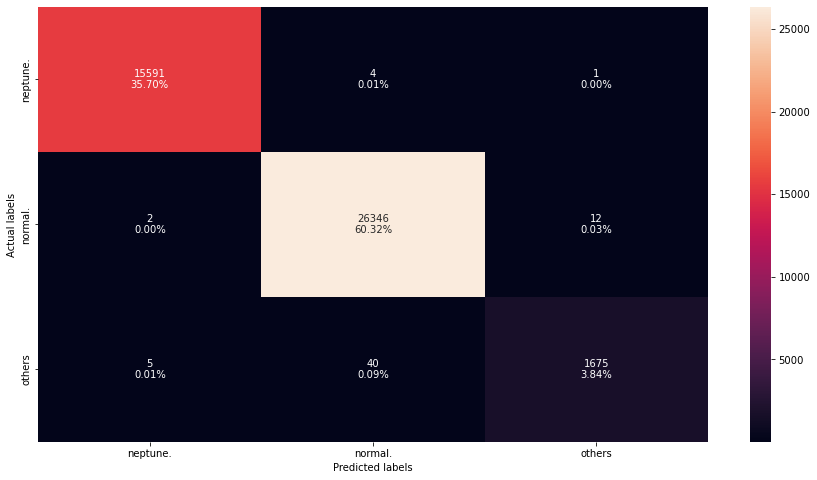

In [24]:
# Confusion matrix heatmap
y_pred = clf.predict(X_test_encoded)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

## Gradient Boost Regressor Example

Refer to the following documentation for more details about the use of gradient boost regression on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

The following example below illustrates the process of creating an gradient boost regression model using sklearn library.

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [28]:
# Gradient Boost Regressor with default hyperparameters
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"R-squared value: {reg.score(X_test,y_test)}")

R-squared value: 0.782360162066957


In [30]:
# Bayes search CV for Gradient Boost Regressor
params = {'learning_rate': Real(0.1,1), 
          'subsample': Real(0.1,1), 
          'min_samples_split': Integer(2,100),
          'min_samples_leaf':Integer(1,100), 
          'min_weight_fraction_leaf': Real(0,0.5), 
          'max_depth': Integer(1,10),
          'min_impurity_decrease': Real(0.0,1.0),
          'max_features': Categorical([None,'sqrt','log2']),
          'max_leaf_nodes': Integer(8,32)}

reg_cv = BayesSearchCV(GradientBoostingRegressor(),params,cv=5,verbose=1,n_jobs=-1)
reg_cv.fit(X_train, y_train)
reg_cv.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('learning_rate', 0.1),
             ('max_depth', 10),
             ('max_features', None),
             ('max_leaf_nodes', 32),
             ('min_impurity_decrease', 1.0),
             ('min_samples_leaf', 100),
             ('min_samples_split', 100),
             ('min_weight_fraction_leaf', 0.0),
             ('subsample', 1.0)])

In [31]:
# Gradient Boost regressor with best hyperparameters from bayes search cv
reg = GradientBoostingRegressor(learning_rate=clf_cv.best_params_['learning_rate'],
                                subsample=clf_cv.best_params_['subsample'],
                                min_samples_split=clf_cv.best_params_['min_samples_split'],
                                min_samples_leaf=clf_cv.best_params_['min_samples_leaf'],
                                min_weight_fraction_leaf=clf_cv.best_params_['min_weight_fraction_leaf'],
                                max_depth=clf_cv.best_params_['max_depth'],
                                min_impurity_decrease=clf_cv.best_params_['min_impurity_decrease'],
                                max_features=clf_cv.best_params_['max_features'],
                                max_leaf_nodes=clf_cv.best_params_['max_leaf_nodes'])
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"R-squared value: {reg.score(X_test,y_test)}")

R-squared value: 0.8096064864355775
